In [1]:
#importing libraires
#Data preprocessing
#Build CNN model: a.  Intialize the CNN
                  #b.Convolution
                  #c.Pooling(Step B and c  to be repeated for each layer)
                  #d. Flattening
                  #e. Full connection
                  #f. O/p layer of this CNN
# Training the CNN
# Compile
# Evaluate


#importing libraires
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#Data Preprocessing
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True)

In [3]:
#preprocessing for training data
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dataset/train',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 480 images belonging to 2 classes.


In [4]:
#preprocessing for testing_data
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
            '/content/drive/MyDrive/Dataset/test',
         target_size=(64,64),
         batch_size=32,
         class_mode='binary')

Found 200 images belonging to 2 classes.


In [5]:
#Building the CNN
cnn = tf.keras.models.Sequential()

#Convolution1
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size =3,activation = 'relu',input_shape=[64,64,3]))
#pooling1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [6]:
#Convoluion2
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu"))
#Pooling2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
#Flattening

cnn.add(tf.keras.layers.Flatten())

In [8]:
#Full Connection(Dense Layer)
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [9]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [10]:
#Compiling the model
cnn.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [13]:
#Training the model
history = cnn.fit(x=train_generator,validation_data = validation_generator,epochs=30
                  )
print(history)

Epoch 1/30
15/15 [==============================] - 58s 4s/step - loss: 0.6916 - accuracy: 0.5229 - val_loss: 0.6924 - val_accuracy: 0.5100
Epoch 2/30
15/15 [==============================] - 17s 1s/step - loss: 0.6860 - accuracy: 0.5646 - val_loss: 0.6865 - val_accuracy: 0.5250
Epoch 3/30
15/15 [==============================] - 15s 974ms/step - loss: 0.6753 - accuracy: 0.5854 - val_loss: 0.6845 - val_accuracy: 0.5750
Epoch 4/30
15/15 [==============================] - 15s 1s/step - loss: 0.6513 - accuracy: 0.6271 - val_loss: 0.7024 - val_accuracy: 0.5500
Epoch 5/30
15/15 [==============================] - 17s 1s/step - loss: 0.6344 - accuracy: 0.6521 - val_loss: 0.7618 - val_accuracy: 0.5100
Epoch 6/30
15/15 [==============================] - 16s 1s/step - loss: 0.6228 - accuracy: 0.6625 - val_loss: 0.6744 - val_accuracy: 0.5900
Epoch 7/30
15/15 [==============================] - 16s 1s/step - loss: 0.6225 - accuracy: 0.6583 - val_loss: 0.6795 - val_accuracy: 0.5300
Epoch 8/30
15/15 

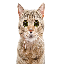

1/1 [==============================] - 0s 119ms/step


'Cat'

In [14]:
#For predicting single data
import numpy as np
import keras.utils as image
test_image = image.load_img("/content/drive/MyDrive/Dataset/predict/cat1.jpg",target_size=(64,64))
test_image.show()
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] ==1:
  prediction = "Dog"
else:
  prediction= "Cat"

prediction

In [15]:
#To know the parameters of history after training the model
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


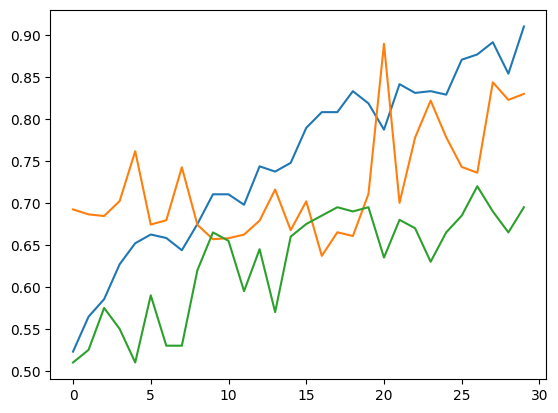

In [16]:
#Graphical Representation
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
